In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

# dimensions of our images.
img_width, img_height = 200, 200

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 1914
nb_validation_samples = 182
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('sigmoid'))                #Added
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# augmentation 
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# augmentation 
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

checkpoint = ModelCheckpoint("first1_cp.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=5)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)




Using TensorFlow backend.


Found 1914 images belonging to 2 classes.
Found 182 images belonging to 2 classes.
Epoch 1/50
119/119 [==============================] - 32s 268ms/step - loss: 0.7438 - acc: 0.6130 - val_loss: 0.5284 - val_acc: 0.7614
Epoch 2/50
119/119 [==============================] - 28s 232ms/step - loss: 0.5565 - acc: 0.7533 - val_loss: 0.5818 - val_acc: 0.6818
Epoch 3/50
119/119 [==============================] - 28s 232ms/step - loss: 0.4396 - acc: 0.8060 - val_loss: 0.3335 - val_acc: 0.8864
Epoch 4/50
119/119 [==============================] - 26s 217ms/step - loss: 0.3306 - acc: 0.8442 - val_loss: 0.2969 - val_acc: 0.8864
Epoch 5/50
119/119 [==============================] - 26s 216ms/step - loss: 0.3276 - acc: 0.8510 - val_loss: 0.3648 - val_acc: 0.8636
Epoch 6/50
119/119 [==============================] - 28s 233ms/step - loss: 0.2936 - acc: 0.8718 - val_loss: 0.3326 - val_acc: 0.8693
Epoch 7/50
119/119 [==============================] - 27s 229ms/step - loss: 0.3008 - acc: 0.8739 - val_los

In [2]:
model.save('firstimplementation-adadelta.h5') 

dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])


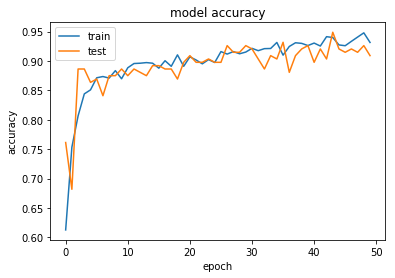

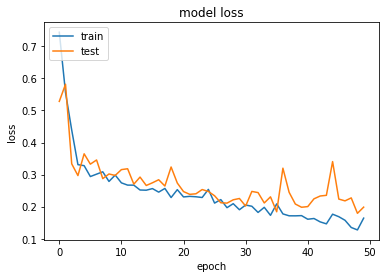

In [3]:

import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()